# MNIST Handwritten Digit Classification

Using MNIST database, Implement two classification algorithms and achieve a high accuracy (more than 90%)

### Summary

### Algo 1:  Fully-connected Neural Network
The network was trained on a 80-20% training-validation for 3 epochs. The result on the test set was **precision: 97%, recall: 97%, f1: 97%**

### Algo 2: Lenet-5 Deep Learning Architecture
The Lenet-5 uses CNN's, local receptive fields, and spacial subsampling, making it robust to The network was trained on a 80-20% training-validation for 10 epochs. The result on the test set was **precision: 93%, recall: 93%, f1: 93%**

The models could achieve better performance as the training epochs are increased


### Setup Prerequisites

Download the data set, import TensorFlow and other utilities, and load the data into a *pandas* `DataFrame`.

In [0]:
import glob
import math
import os

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))



TensorFlow version: 1.12.0
Eager execution: False


Using TensorFlow backend.


In [ ]:
!pip install python-mnist

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


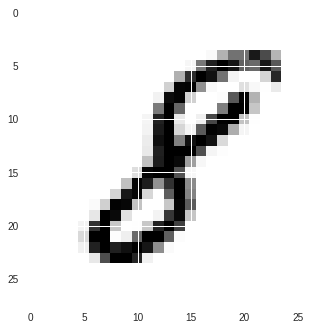

In [0]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
print(x_test.shape)
print(x_test[0].shape)

(10000, 28, 28)
(28, 28)


### Summarize the Data

In [0]:
print(y_train.shape)
print(y_test.shape)

print("Classes in Training =", np.unique(y_train))
print("Classes in validation =", np.unique(y_test))


(60000,)
(10000,)
Classes in Training = [0 1 2 3 4 5 6 7 8 9]
Classes in validation = [0 1 2 3 4 5 6 7 8 9]


### Historgram of Classes

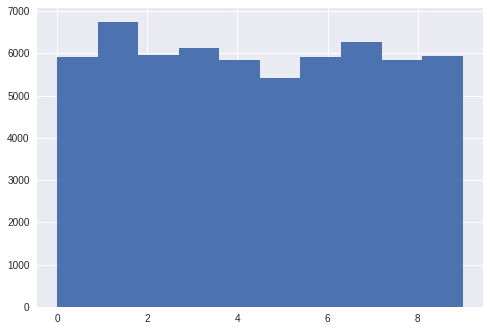

In [0]:
plt.figure()
plt.hist(y_train, bins=np.unique(y_train).shape[0],)       # Histogram of classes in training set
plt.show()

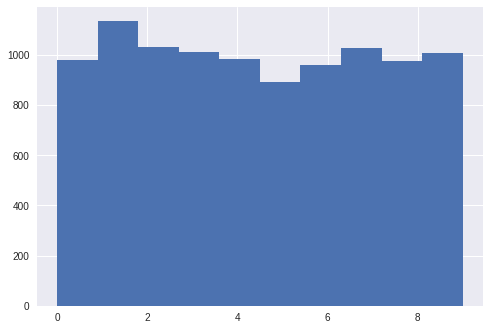

In [0]:
plt.figure()
plt.hist(y_test, bins=np.unique(y_test).shape[0],)       # Histogram of classes in training set
plt.show()

### One Hot Encoding

In [0]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_one_hot = label_binarizer.fit_transform(y_train)
test_one_hot = label_binarizer.fit_transform(y_test)

In [0]:
train_one_hot

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

### Pre-process
Normalize pixels

In [0]:
norm_x_test = tf.keras.utils.normalize(x_test,axis=1)
norm_x = tf.keras.utils.normalize(x_train,axis=1)

### Solution 1 :  Fully Connected Neural Network Model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],validation_split=0.2)



### Train Fully-Connected Layer Neural Network Model

In [0]:
model.fit(norm_x,y_train, batch_size=128, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 45us/step - loss: 0.0338 - acc: 0.9907
Epoch 2/3
60000/60000 [==============================] - 3s 45us/step - loss: 0.0297 - acc: 0.9924
Epoch 3/3
60000/60000 [==============================] - 3s 45us/step - loss: 0.0268 - acc: 0.9935


In [0]:
val_loss, val_acc = model.evaluate(norm_x_test, y_test)


10000/10000 [==============================] - 0s 47us/step


### Confusion Matrix

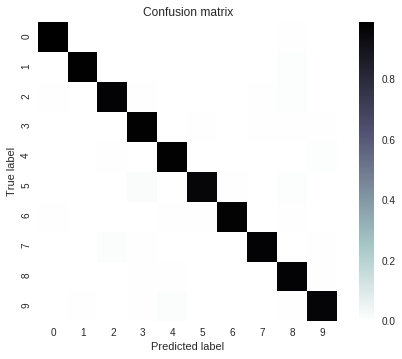

In [0]:
  cm = metrics.confusion_matrix(y_test, test_prediction)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()



### Confusion Matrix

In [0]:
cm

array([[ 969,    0,    0,    0,    1,    1,    2,    1,    4,    2],
       [   0, 1116,    4,    0,    0,    0,    2,    0,   13,    0],
       [   5,    1, 1001,    7,    2,    0,    2,    6,    8,    0],
       [   0,    0,    1,  987,    1,    4,    0,    5,    7,    5],
       [   0,    0,    4,    1,  963,    0,    3,    1,    2,    8],
       [   2,    0,    1,   16,    1,  857,    4,    1,    8,    2],
       [   7,    2,    1,    1,    4,    4,  935,    0,    4,    0],
       [   2,    2,   12,    7,    2,    0,    0,  997,    1,    5],
       [   1,    1,    3,    6,    5,    2,    3,    2,  946,    5],
       [   2,    5,    0,    6,   12,    2,    1,    3,    4,  974]])

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, test_prediction)))


Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7efbff906cd0>:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.97      0.97      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




### Solution 2: Lenet-5 Architecture

### Input
The LeNet architecture originally accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are 28x28 and grayscale, C is 1 in this case, and I modified the network to accept 28x28x1 input.

### Architecture
Layer 1: Convolutional. The input shape should be 28x28x6.

Activation. Relu.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Relu.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D. 

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Relu.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Relu.

Layer 5: Fully Connected (Logits). This should have 10 outputs.

In [0]:
modelenet = Sequential()
# Layer 1
modelenet.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1),
                 strides = 1))
modelenet.add(BatchNormalization(axis=-1))

modelenet.add(MaxPooling2D(pool_size=(2,2)))
modelenet.add(Dropout(0.25))

# Layer 2 
modelenet.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',
                 strides = 2)
             )
modelenet.add(BatchNormalization(axis=-1))

modelenet.add(MaxPooling2D(pool_size=(2,2)))
modelenet.add(Dropout(0.25))

modelenet.add(Flatten())

#  Layer 3
modelenet.add(Dense(120, activation='relu'))

# Layer 4
modelenet.add(Dense(84, activation='relu'))
modelenet.add(Dropout(0.25))

# Layer 5
modelenet.add(Dense(10, activation='relu'))

modelenet.compile(loss='categorical_crossentropy', optimizer="adam",
              metrics=['accuracy'])


In [0]:
gen = ImageDataGenerator()

test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(norm_x.reshape(norm_x.shape[0], 28, 28, 1)
, train_one_hot, batch_size=64)
test_generator = test_gen.flow(norm_x_test.reshape(norm_x_test.shape[0], 28, 28, 1)
, test_one_hot, batch_size=64)

In [0]:
modelenet.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=10, 
                    validation_data=test_generator, validation_steps=10000//64, shuffle=True)


Epoch 1/10
937/937 [==============================] - 12s 13ms/step - loss: 0.7618 - acc: 0.8347 - val_loss: 0.4105 - val_acc: 0.9107
Epoch 2/10
937/937 [==============================] - 12s 13ms/step - loss: 0.7741 - acc: 0.8302 - val_loss: 0.5154 - val_acc: 0.8466
Epoch 3/10
937/937 [==============================] - 12s 13ms/step - loss: 0.7712 - acc: 0.8361 - val_loss: 0.4424 - val_acc: 0.9100
Epoch 4/10
937/937 [==============================] - 12s 13ms/step - loss: 0.8101 - acc: 0.8288 - val_loss: 0.4221 - val_acc: 0.9104
Epoch 5/10
937/937 [==============================] - 12s 13ms/step - loss: 0.7429 - acc: 0.8473 - val_loss: 0.3795 - val_acc: 0.9167
Epoch 6/10
937/937 [==============================] - 12s 13ms/step - loss: 0.7477 - acc: 0.8249 - val_loss: 0.5773 - val_acc: 0.8464
Epoch 7/10
937/937 [==============================] - 12s 13ms/step - loss: 0.7859 - acc: 0.8207 - val_loss: 0.4449 - val_acc: 0.9099
Epoch 8/10
937/937 [==============================] - 12s 13ms

In [0]:
test_lenet = modelenet.predict_classes(norm_x_test.reshape(norm_x_test.shape[0], 28, 28, 1))

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (modelenet, metrics.classification_report(y_test, test_lenet)))


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f852e275b38>:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.92      0.92      1032
           3       0.88      0.93      0.91      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.91      0.93       892
           6       0.95      0.96      0.95       958
           7       0.92      0.92      0.92      1028
           8       0.91      0.82      0.86       974
           9       0.90      0.92      0.91      1009

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000




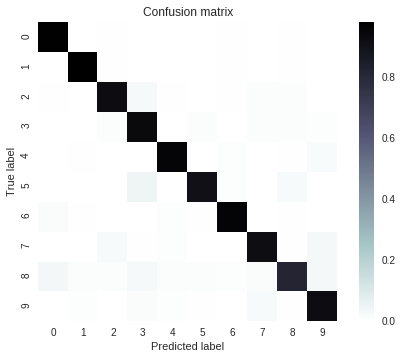

In [0]:
  cm = metrics.confusion_matrix(y_test, test_lenet)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()



## Some Discussion
Describe the techniques, including data preparation, feature reduction and training tricks in your classification algorithms.

### Data Preparation

###  Data Normalization : tf.keras.utils.normalize

``` python
norm_x_test = tf.keras.utils.normalize(x_test,axis=1)
norm_x = tf.keras.utils.normalize(x_train,axis=1) ```

The input features are normalized using tf.keras.utils.normalize(). The raw pixel is composed of values ranging from 0 to 255. In this step, the values are converted to a range between 0 and 1. This performs L-2 normalization on the data.

### Label One-hot Encoding
The raw label data is a number between 0 and 9, corresponding to each digit. For the Neural Network in both algorithms, it basically employs multiple binary-classifiers, hence one-hot encoding transforms the label to an array where each collumn corresponds to the binary variable representing each label. 


```
label,	0_,		1_,		2_,		3_,		4_  . . .
0,		1,		 0,		 0,		 0,		 0,	. . .
1,		0,		 1,		 0,		 0,		 0,	. . .
2,		0,		 0,		 2,		 0,		 0,	. . .
3,		0,		 0,		 0,		 3,		 0,	. . .
```

### Training Data Batch Generator

``` python
train_generator = gen.flow(norm_x.reshape(norm_x.shape[0], 28, 28, 1)
, train_one_hot, batch_size=64)
test_generator = test_gen.flow(norm_x_test.reshape(norm_x_test.shape[0], 28, 28, 1)
, test_one_hot, batch_size=64)```

The training and test data are separated into smaller batches. Each subset is passed forward and back to learn the network weights.

### Feature Reduction

### Pooling Layer
```python
modelenet.add(MaxPooling2D(pool_size=(2,2)))```

The first algorithm, the fully connected network, uses all input features in the classification task. This means the 28x28 input uses all 784 pixels and the network has to learn all 784 weights for each of them. As the network grows deeper, doing this would be computationally costly, hence the need to reduce these inputs.

For the Lenet-5 algorithm, pooling layers are used to reduce the input to succeeding layers. I used a maxpooling layer after each Convolution layer, with a 2x2 kernel size and stride width of 2. This reduces the input from 28x28 to 14x14 after the first convolution layer, and 10x10 to 5x5 after the second convolution layer.



### Other Training Tricks
### ReLU Activation Function
The algorithm uses ReLU (Rectified Linear Unit) which brings non-linearity to the learning task, which allows learning of complex patterns in the training data. It is easier to train the network using ReLUs and it reduces the likelihood of vanishing gradient to occur.

### Batch Normalization
```python
modelenet.add(MaxPooling2D(pool_size=(2,2)))```

The activations of the previous layers are normalized so that it maintains a mean activation close to 0 and the standard deviation close to 1.

### Dropout Layer
```python
modelenet.add(Dropout(0.25))
```
Dropout layers are introduced in between layers in order to improve performance against overfitting. What dropout does is it deactivates a subset of the neurons on the previous layer which has the effect of slightly decreasing the performance on the training data, but has shown to improve the performance on test data. In this example, 1/4 of the layer is *dropped or deactivated during training.

### Adam Optimizer
Adam optimizer is the algorithm used to  update the network weights in the training iterations. The strength of the algorithms is that the learning rate is adaptively selected and changes in the course of training.



### Epochs, Batch Size, Iterations
We can increase the epochs so we can learn the weights better through multiple iterations. It would help to track the training cost function through visualization to give us an idea whether we are overfitting on the training data.

### Early Stopping
More training iterations doesn't necessarily mean better because it could lead to overfitting. Early stopping only means the training could be stopped when the validation accuracy hits a certain plateau.

### Data Augmentation

```
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,height_shift_range=0.08, zoom_range=0.08)

```

The imagedatagenerator can be used to augment the training data by performing different pre-processing methods on the raw input like shift, rotation, shear and crop. 

### Transfer Learning

We can use pre-trained model weights that were trained on a different training data and use it as a form of feature extractor for our classification task.

### Other Activation Functions
We can experiment and use other activation functions such as sigmoid or tanh

